In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import linear_model

In [36]:
output_file = "all_output.csv"
capital_file = "all_capital.csv"

In [37]:
output_df = pd.read_csv(output_file)
capital_df = pd.read_csv(capital_file)

In [38]:
output_df.head()

,country,var,code,_1970,_1971,_1972,_1973,_1974,_1975,_1976,...,_2006,_2007,_2008,_2009,_2010,_2011,_2012,_2013,_2014,_2015
0,AT,VA,TOT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,237683.2,251926.6,260533.0,254762.6,262311.7,274852.3,281955.9,287194.6,294442.6,302653.1
1,AT,VA,MARKT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,176040.2,188172.0,193812.2,185873.8,191270.1,201640.6,206339.3,209268.0,214198.7,219236.5
2,AT,VA,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3494.2,4029.8,3946.8,3306.1,3761.9,4427.7,4330.3,4124.1,4033.7,3905.4
3,AT,VA,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1058.5,986.7,1345.3,1076.4,1179.3,1502.7,1515.9,1482.8,1452.6,1182.7
4,AT,VA,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,47702.3,51524.0,51051.5,47034.5,48983.1,51580.7,53382.5,53554.3,54581.6,57220.9


In [260]:
# Select AT rows
# Select TOT (total economy rows)
# Select GO, CAP, EMP, II rows
country = "US"
code = "A"
var_names = ['GO_QI', 'GO_P', 'GO', 'CAP_QI', 'CAP', 'H_EMP', 'H_EMPE', 'II_QI']
# var_names = ['VA', 'GO', 'II', 'COMP', 'EMP', 'EMPE', 'H_EMP', 'H_EMPE', 'VA_P',
#        'GO_P', 'II_P', 'VA_QI', 'GO_QI', 'II_QI', 'LP_I', 'LAB', 'CAP',
#        'LAB_QI', 'CAP_QI', 'CAPIT_QI', 'CAPNIT_QI', 'VA_Q', 'VAConH',
#        'VAConLC', 'VAConKIT', 'VAConKNIT', 'VAConTFP', 'TFPva_I', 'LP1_Q',
#        'LP1ConLC', 'LP1ConKIT', 'LP1ConKNIT', 'LP1ConTFP', 'TFPlp1_I',
#        'LP2_Q', 'LP2ConLC', 'LP2ConKIT', 'LP2ConKNIT', 'LP2ConTFP',
#        'TFPlp2_I']
y_var = 'GO_QI'
out_df = output_df.loc[(output_df['country'] == country) & 
                       (output_df['code']== code) & 
                       (output_df['var'].isin(var_names))]
# Remove all NaN columns
out_df = out_df.dropna(axis = 1, how = "any")

# Drop the country and code rows
out_df = out_df.drop(["country", "code"], axis = 1)

# Transpose the data frame
out_df = out_df.T

# Rename the colums with the var names
out_df = out_df.rename(columns=out_df.iloc[0]).drop(out_df.index[0])

# Convert to numeric
out_df = out_df.astype('float')

# Add a new column that indexes the years
out_df['YearIndex'] = np.arange(len(out_df))

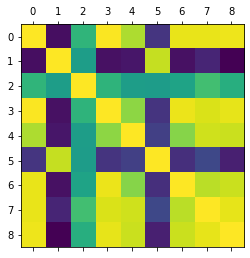

In [261]:
plt.matshow(out_df.corr())
plt.show()

In [264]:
out_df.corr()['YearIndex']

GO           0.956295
H_EMP       -0.841205
H_EMPE       0.310425
GO_P         0.929351
GO_QI        0.855396
II_QI       -0.676750
CAP          0.850448
CAP_QI       0.934382
YearIndex    1.000000
Name: YearIndex, dtype: float64

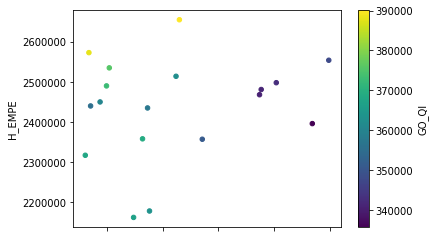

In [267]:
ax1 = out_df.plot.scatter(x='H_EMP', y='H_EMPE', c='GO_QI', colormap='viridis')

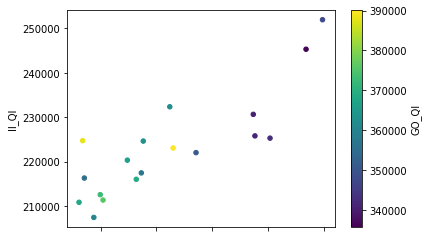

In [268]:
ax2 = out_df.plot.scatter(x='H_EMP', y='II_QI', c='GO_QI', colormap='viridis')

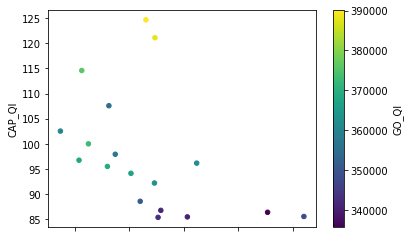

In [269]:
ax3 = out_df.plot.scatter(x='II_QI', y='CAP_QI', c='GO_QI', colormap='viridis')

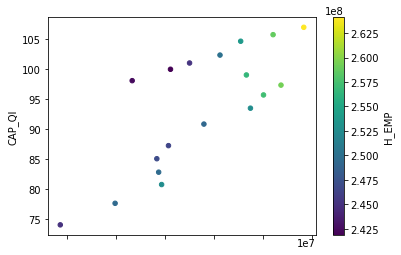

In [247]:
ax4 = out_df.plot.scatter(x='II_QI', y='CAP_QI', c='H_EMP', colormap='viridis')

In [270]:
150*20

3000

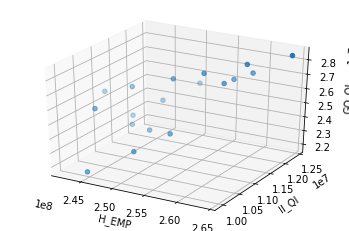

In [249]:
threedee = plt.figure().gca(projection='3d')
threedee.scatter(out_df["H_EMP"], out_df["II_QI"], out_df['GO_QI'])
threedee.set_xlabel('H_EMP')
threedee.set_ylabel('II_QI')
threedee.set_zlabel('GO_QI')
plt.show()

In [250]:
def getRegressionScore(df, country, sector, y_var = 'GO_QI', x_var=['GO_QI', 'CAP_QI', 'LAB_QI', 'II_QI']):
    out_df = df.loc[(output_df['country'] == country) & 
                    (output_df['code']== sector) & 
                    (output_df['var'].isin(x_var))]
    
    print(country, sector)

    # Remove all NaN columns
    out_df = out_df.dropna(axis = 1, how = "any")

    # Drop the country and code rows
    out_df = out_df.drop(["country", "code"], axis = 1)

    # Transpose the data frame
    out_df = out_df.T

    # If less than 2 observations then halt the experiment
    if (len(out_df) < 2):
        return(np.nan, np.nan, len(out_df))
    # Rename the colums with the var names
    out_df = out_df.rename(columns=out_df.iloc[0]).drop(out_df.index[0])

    # Convert to numeric
    out_df = out_df.astype('float')

    # Add a new column that indexes the years
    out_df['YearIndex'] = np.arange(len(out_df))
    
    # Check if the Y variable has been dropped in the NA cleaning phase
    if y_var not in out_df.columns:
        return(np.nan, np.nan, len(out_df))
    
    # Check if any explanatory variable has been dropped in the NA cleaning phase
    if not (set(x_var) <= set(out_df.columns)):
        return(np.nan, np.nan, len(out_df))
    
    # Run linear regression on the features and record the score
    ols = linear_model.LinearRegression(normalize=True)
    X = out_df[x_var].drop(y_var, axis = 1)
    Y = out_df[y_var]
    ols.fit(X, Y)
    score = ols.score(X,Y)
    
    # Run linear regression where the only explanatory variable is the time index
    stupid_ols = linear_model.LinearRegression(normalize=True)
    X = out_df[['YearIndex']]
    stupid_ols.fit(X, Y)
    stupid_score = stupid_ols.score(X, Y)
    
    
    return(score, stupid_score, len(Y))


In [251]:
countries = output_df['country'].unique()
sectors = output_df['code'].unique()

countries = ['AT', 'BE', 'DE', 'DK', 'ES', 'FI', 'FR','IT','NL', 'UK', 'US']
sectors = ['16-18', '19', '20-21', '22-23', '28', '53', '10-12', '13-15', '24-25', '26-27', '29-30', 'C', 
           '49-52','A', 'B','D-E', 'F', 'R-S']

In [252]:
regressionDf = pd.DataFrame(columns=['Country', 'Sector', 'Score', 'StupidScore', 'N'])

for country in countries:
    for sector in sectors:
        score, stupid_score, N = getRegressionScore(output_df, country, sector)
        currDf = pd.DataFrame({'Country': country,
                               'Sector': sector,
                               'Score': score,
                               'StupidScore': stupid_score,
                               'N': N}, index=[0])
        regressionDf = regressionDf.append(currDf, ignore_index = True)

AT 16-18
AT 19
AT 20-21
AT 22-23
AT 28
AT 53
AT 10-12
AT 13-15
AT 24-25
AT 26-27
AT 29-30
AT C
AT 49-52
AT A
AT B
AT D-E
AT F
AT R-S
BE 16-18
BE 19
BE 20-21
BE 22-23
BE 28
BE 53
BE 10-12
BE 13-15
BE 24-25
BE 26-27
BE 29-30
BE C
BE 49-52
BE A
BE B
BE D-E
BE F
BE R-S
DE 16-18
DE 19
DE 20-21
DE 22-23
DE 28
DE 53
DE 10-12
DE 13-15
DE 24-25
DE 26-27
DE 29-30
DE C
DE 49-52
DE A
DE B
DE D-E
DE F
DE R-S
DK 16-18
DK 19
DK 20-21
DK 22-23
DK 28
DK 53
DK 10-12
DK 13-15
DK 24-25
DK 26-27
DK 29-30
DK C
DK 49-52
DK A
DK B
DK D-E
DK F
DK R-S
ES 16-18
ES 19
ES 20-21
ES 22-23
ES 28
ES 53
ES 10-12
ES 13-15
ES 24-25
ES 26-27
ES 29-30
ES C
ES 49-52
ES A
ES B
ES D-E
ES F
ES R-S
FI 16-18
FI 19
FI 20-21
FI 22-23
FI 28
FI 53
FI 10-12
FI 13-15
FI 24-25
FI 26-27
FI 29-30
FI C
FI 49-52
FI A
FI B
FI D-E
FI F
FI R-S
FR 16-18
FR 19
FR 20-21
FR 22-23
FR 28
FR 53
FR 10-12
FR 13-15
FR 24-25
FR 26-27
FR 29-30
FR C
FR 49-52
FR A
FR B
FR D-E
FR F
FR R-S
IT 16-18
IT 19
IT 20-21
IT 22-23
IT 28
IT 53
IT 10-12
IT 13-15
IT 24-

In [253]:
regressionDf.dropna().describe()

,Score,StupidScore
count,151.000000,151.000000
mean,0.940575,0.594277
std,0.123153,0.315183
min,0.185460,0.000225
25%,0.952233,0.364703
50%,0.982098,0.726527
75%,0.993658,0.854010
max,0.999324,0.986216


In [254]:
regressionDf[regressionDf['Score']<0.9]

,Country,Sector,Score,StupidScore,N
13,AT,A,0.815302,0.726614,21
21,BE,22-23,0.890733,0.284769,17
37,DE,19,0.708743,0.026592,21
49,DE,A,0.416355,0.176904,21
55,DK,19,0.762508,0.021325,21
59,DK,53,0.734707,0.015748,21
67,DK,A,0.563898,0.594656,21
68,DK,B,0.442446,0.140805,21
69,DK,D-E,0.862891,0.141944,21
95,FI,53,0.862254,0.467893,32


In [276]:
grid = np.random.binomial(1, 0.2, size=(3,3))
indices =  np.random.randint(0, high=3, size=2)

# Extract the row and column indices
i = indices[0]
j = indices[1]
i 
j

1

### Run experiments according to procedures in

In [277]:
np.random.choice(grid.size)

7

In [278]:
grid.size

9

In [279]:
num_users = 5
num_items = 9
num_ratings = 10
idx = np.random.choice(num_users*num_items, num_ratings, replace = False)

In [291]:
user_idx = idx//num_items
item_idx = idx%num_items

In [302]:
def rate_item(user, item):
    return np.random.choice(5)

In [310]:
ratings = list(map(rate_item, user_idx, item_idx))

In [314]:
np.column_stack((user_idx, item_idx, ratings))

array([[4, 8, 4],
       [1, 5, 2],
       [0, 4, 1],
       [1, 4, 3],
       [1, 6, 1],
       [2, 3, 4],
       [3, 3, 1],
       [0, 7, 3],
       [4, 6, 4],
       [0, 0, 4]])

In [299]:
21//num_items

2